In [1]:
# Import the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data visualization

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Print all column names
print('Columns are: ', train_data.columns.values)
print('Shape of training dataset is: ', train_data.shape)

Columns are:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Shape of training dataset is:  (891, 12)


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.shape

(891, 12)

In [7]:
p1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_firstclass = sum(p1)/len(p1)

print("% of 1st class passengers who survived: {:.2f}%".format(rate_firstclass*100))

% of 1st class passengers who survived: 62.96%


In [8]:
p1 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_secondclass = sum(p1)/len(p1)

print("% of 2nd class passengers who survived: {:.2f}%".format(rate_secondclass*100))

% of 2nd class passengers who survived: 47.28%


In [9]:
p1 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_thirdclass = sum(p1)/len(p1)

print("% of 3rd class passengers who survived: {:.2f}%".format(rate_thirdclass*100))

% of 3rd class passengers who survived: 24.24%


In [10]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived: {:.2f}%".format(rate_men*100))

% of men who survived: 18.89%


In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived: {:.2f}%".format(rate_women*100))

% of women who survived: 74.20%


In [12]:
children = train_data.loc[(train_data.Age < 18) & (train_data.Sex == 'female') & (train_data.Pclass == 1) & (train_data.Survived)]
# rate_children = sum(children)/len(children)
print(children)
print(children.shape[0])
# print("% of children who survived: {:.2f}%".format(rate_children*100))

     PassengerId  Survived  Pclass  \
307          308         1       1   
329          330         1       1   
435          436         1       1   
504          505         1       1   
689          690         1       1   
781          782         1       1   
853          854         1       1   

                                                  Name     Sex   Age  SibSp  \
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.0      1   
329                       Hippach, Miss. Jean Gertrude  female  16.0      0   
435                          Carter, Miss. Lucile Polk  female  14.0      1   
504                              Maioni, Miss. Roberta  female  16.0      0   
689                  Madill, Miss. Georgette Alexandra  female  15.0      0   
781          Dick, Mrs. Albert Adrian (Vera Gillespie)  female  17.0      1   
853                          Lines, Miss. Mary Conover  female  16.0      0   

     Parch    Ticket      Fare    Cabin Embarked  
307      0 

In [13]:
# Survival Rates on the basis of Passenger Class
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Survival Rates on the basis of Sex
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


/Users/vishaal811/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vishaal811/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


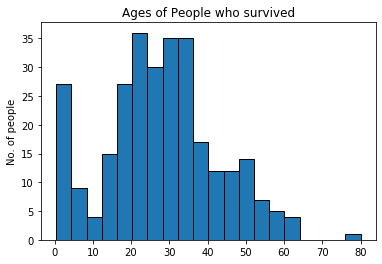

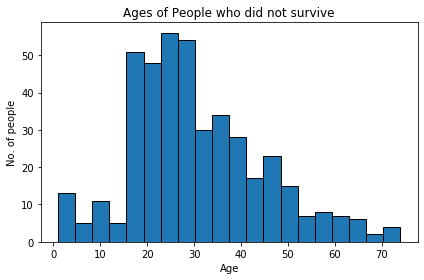

In [15]:
# Plot the histogram of survival on the basis of Age

survived = train_data.loc[train_data.Survived == 1]
plot1 = plt.figure(1)
plt.hist(survived.Age, bins = 20, edgecolor = 'black')
plt.title('Ages of People who survived')
plt.ylabel('No. of people')


not_survived = train_data.loc[train_data.Survived == 0]
plot2 = plt.figure(2)
plt.hist(not_survived.Age, bins = 20, edgecolor = 'black')
plt.title('Ages of People who did not survive')
plt.xlabel('Age')
plt.ylabel('No. of people')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy = {:.2f}%".format(accuracy_score(y, model.predict(X))*100))

Accuracy = 81.59%


In [18]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
